## IMPORTING OF LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")

## EDA

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

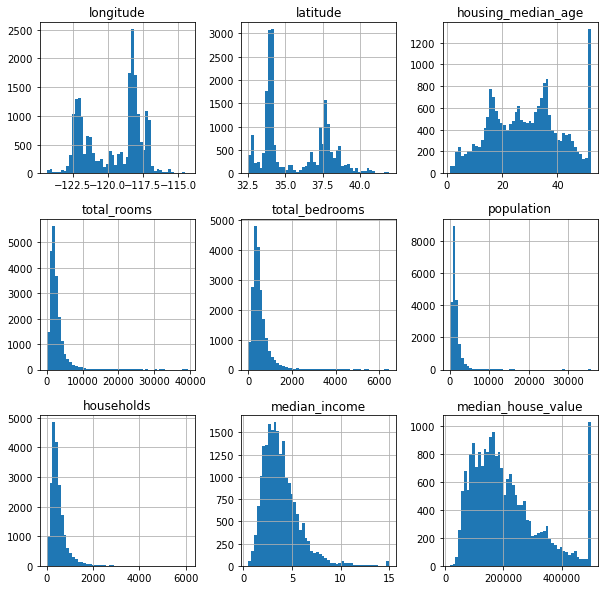

In [5]:
df.hist(bins=50, figsize = (10,10))

<AxesSubplot:>

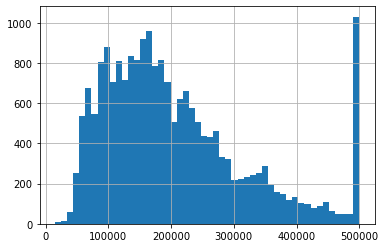

In [6]:
### median house value has a long tail
df.median_house_value.hist(bins=50)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df = df.drop(columns='ocean_proximity')

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

In [12]:
df.population.median()

1166.0

## Question 3

In [13]:
# 60 , 20, 20 spread
n = len(df)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [18]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [19]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [20]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [21]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


### Filling NAs to compare RSME scores using the two different approaches

#### Filling with 0

In [22]:
def prepare_X(df, filler):
    df = df.copy()
    df_num = df.fillna(filler)
    X = df_num.values
    return X

In [23]:
def train_linear_regression(X,y):
    
    ##adding a first column of ones
    ## This is trying to replicate w0*x0 where x0 is 1
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [24]:
X_train_zero = prepare_X(df_train,0)
w0,w = train_linear_regression(X_train_zero, y_train)

w0, w

(-11.686975242003061,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [25]:
y_pred = w0 + X_train_zero.dot(w)
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

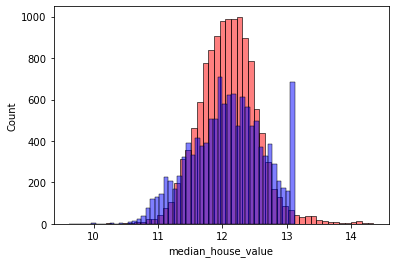

In [26]:
sns.histplot(y_pred, color="red", alpha = 0.5, bins=50)
sns.histplot(y_train, color="blue", alpha = 0.5, bins=50)

In [27]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [28]:
rmse(y_train, y_pred)

0.34131359101566694

#### compare with validation dataset

In [29]:
X_train_zero = prepare_X(df_train,0)
w0,w = train_linear_regression(X_train_zero, y_train)

X_val = prepare_X(df_val,0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.33

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

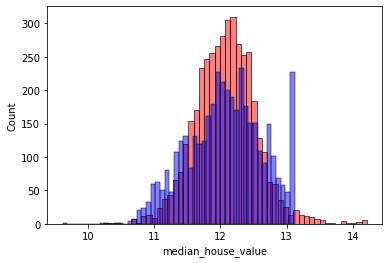

In [30]:
sns.histplot(y_pred, color="red", alpha = 0.5, bins=50)
sns.histplot(y_val, color="blue", alpha = 0.5, bins=50)

#### Filling with mean

In [31]:
mean_value = df.total_bedrooms.mean()

In [32]:
X_train_mean = prepare_X(df_train, mean_value)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X(df_val, mean_value)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.33

#### Filling with median

In [33]:
median_value = df.total_bedrooms.median()

In [34]:
X_train_median = prepare_X(df_train, median_value)
w0, w = train_linear_regression(X_train_median, y_train)

X_val = prepare_X(df_val, mean_value)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.33

In [35]:
np.allclose(X_train_zero, X_train_mean)

False

In [36]:
X_train_mean

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [37]:
df_val.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## Question 4

In [43]:
def prepare_X(df):
    df = df.copy()
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [44]:
def train_linear_regression(X,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [45]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [46]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0,w = train_linear_regression(X_train, y_train,r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r,w0,score)

0 -11.686975242003061 0.33
1e-06 -11.686959176148244 0.33
0.0001 -11.685368865331979 0.33
0.001 -11.67093131828245 0.33
0.01 -11.528493585912102 0.33
0.1 -10.27450028213464 0.33
1 -4.920480897725033 0.33
5 -1.482095745623377 0.34
10 -0.7899311832263198 0.34


## Question 5

In [61]:
def prepare_X(df):
    df = df.copy()
    df_num = df.fillna(0)
    X = df_num.values
    return X

def train_linear_regression(X,y):
    
    ##adding a first column of ones
    ## This is trying to replicate w0*x0 where x0 is 1
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return round(np.sqrt(mse),2)


In [62]:

# 60 , 20, 20 spread
n = len(df)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

all_scores = []
idx = np.arange(n)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)

    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    X_train = prepare_X(df_train)
    w0,w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    all_scores.append(score)

    print(seed,w0,score)


0 -11.900382138365607 0.34
1 -11.978180419408602 0.34
2 -11.83448355061539 0.35
3 -11.503004940302986 0.34
4 -11.641797790899831 0.35
5 -11.847257946825188 0.34
6 -11.874511982692955 0.35
7 -11.35105392234475 0.34
8 -11.733632556254435 0.34
9 -11.746262434241961 0.34


In [63]:
all_scores

[0.34, 0.34, 0.35, 0.34, 0.35, 0.34, 0.35, 0.34, 0.34, 0.34]

In [64]:
std = np.std(all_scores)
round(std, 3)

0.005

## Question 6

In [73]:
def train_linear_regression(X,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [74]:

## Doing a full train using both traing and valididation dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
X_full_train


array([[-1.2225e+02,  3.8020e+01,  1.6000e+01, ...,  9.4600e+02,
         2.6600e+02,  5.7001e+00],
       [-1.1736e+02,  3.4480e+01,  3.0000e+00, ...,  7.5880e+03,
         2.2850e+03,  3.9792e+00],
       [-1.1763e+02,  3.3470e+01,  4.0000e+00, ...,  8.0500e+02,
         2.7100e+02,  7.6012e+00],
       ...,
       [-1.1935e+02,  3.6330e+01,  1.4000e+01, ...,  5.6800e+02,
         2.2900e+02,  3.1486e+00],
       [-1.2123e+02,  3.7870e+01,  4.9000e+01, ...,  5.9000e+01,
         2.6000e+01,  3.6500e+00],
       [-1.2060e+02,  3.7370e+01,  1.0000e+01, ...,  1.3680e+03,
         4.8700e+02,  4.6667e+00]])

In [75]:
y_full_train = np.concatenate([y_train, y_val])
w0,w = train_linear_regression(X_full_train, y_full_train, r=0.001)
w0


-11.498881412139522

In [76]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.34